# Team 5 tamrin 1
-  Fateme Sharbatian
-  Fateme jafari
-  Hanie nori


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

print('libraries loaded.')

libraries loaded.


# Loading IRIS dataset

In [3]:
df_iris = pd.read_csv('Data/iris.txt', sep= ',', header= None) 

df_iris.head()

,0,1,2,3,4
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,6.6,2.9,4.6,1.3,Iris-versicolor
3,4.6,3.2,1.4,0.2,Iris-setosa
4,6.0,2.2,4.0,1.0,Iris-versicolor


# Calculating similarities between samples

## defining function for calculating similarity

In [4]:
def calculate_similarity(A, B, std):
    '''The function definition fgoes here.'''
    
    from numpy.linalg import norm
    
    return np.exp(np.divide(norm(np.subtract(A, B))**2, -2 * std**2))
   

## Calculating IRIS standard seviation

In [5]:
std = 0.73

## Calculating similarities

In [6]:
similarity_values = np.zeros((len(df_iris), len(df_iris)))

similarity_values.fill(np.nan)

for i in range(len(df_iris)):
    
    for j in range(i + 1, len(df_iris)):
        
        similarity_values[i, j] = np.round(calculate_similarity(df_iris.loc[i][:4], df_iris.loc[j][:4], std), 3)
    
    

## Calculating mean & standard deviation of similarities

In [7]:
similarity_mean = np.round(np.nanmean(similarity_values), 3)

similarity_std = np.round(np.nanstd(similarity_values), 3)

print(f'Similarity mean: {similarity_mean}, std: {similarity_std}')

Similarity mean: 0.199, std: 0.289


# Calculating adjacent matrix based on similarities

## Defining the threshold

In [8]:
threshold = np.round(similarity_mean + (2 * similarity_std), 3)

threshold

0.777

## Producing adjacent matrix based on threshold value

In [9]:
adjacent = np.copy(similarity_values)

adjacent = np.where(adjacent >= threshold, 1, 0)

adjacent[np.isnan(adjacent)] = 0

print('Number of edges: ', adjacent.sum())

Number of edges:  803


# Graph analysis

In [10]:
adjacent_df = pd.DataFrame(adjacent.T + adjacent)

#adjacent_df = adjacent_df.loc[adjacent_df.sum() != 0, adjacent_df.sum() != 0 ]

adjacent_df.shape

(150, 150)

## Calculating degree of nodes

Mean of nodes degree:  10.707


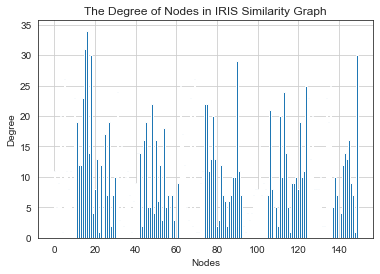

In [11]:
degree_of_nodes = adjacent_df.sum().to_dict()

mean_of_degree = np.sum(list(degree_of_nodes.values()))/ 150.0

print('Mean of nodes degree: ', np.round(mean_of_degree, 3))

plt.bar(degree_of_nodes.keys(), degree_of_nodes.values())

plt.title('The Degree of Nodes in IRIS Similarity Graph')

plt.xlabel('Nodes')
plt.ylabel('Degree')

plt.grid()

plt.show()

## Representing degree sequence

In [12]:
degree_sequence = dict(sorted(degree_of_nodes.items(), key= lambda item: item[1], reverse= True))

print(list(degree_sequence.values()))

[34, 31, 30, 30, 29, 26, 26, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 17, 17, 16, 16, 16, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


## Representing degree distribution

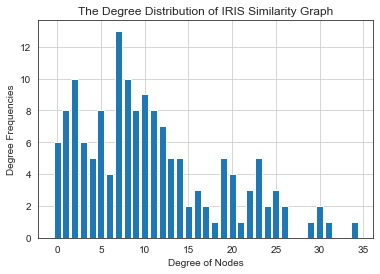

In [13]:
degree_distribution = Counter(degree_sequence.values())

plt.bar(degree_distribution.keys(), degree_distribution.values())

plt.title('The Degree Distribution of IRIS Similarity Graph')

plt.xlabel('Degree of Nodes')
plt.ylabel('Degree Frequencies')

plt.grid()

plt.show()

## Representing degree probability mass function (PMF)

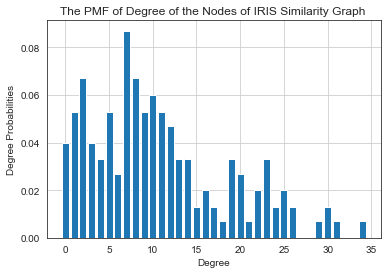

In [14]:
pmf = {d: np.round(nk / 150, 3) for d, nk in degree_distribution.items()}

plt.bar(pmf.keys(), pmf.values())

plt.title('The PMF of Degree of the Nodes of IRIS Similarity Graph ')

plt.xlabel('Degree')
plt.ylabel('Degree Probabilities')

plt.grid()

plt.show()

## Calculating path average of the graph

In [15]:
G = nx.from_pandas_adjacency(adjacent_df, create_using= nx.DiGraph)

print('Number of strongly connected components in the IRIS graph', nx.number_strongly_connected_components(G))

Number of strongly connected components in the IRIS graph 11


### Extracting Components

In [16]:
graphs = nx.condensation(G)

component_0 = graphs.nodes.data()[0]['members']

component_1 = graphs.nodes.data()[1]['members']

G0 = G.subgraph(component_0)

G1 = G.subgraph(component_1)

print('Diameter of component_0: ', nx.diameter(G0), end= '')

print(' Radius of component_0: ', nx.radius(G0))

print('Diameter of component_1: ', nx.diameter(G1), end= '')

print('  Radius of component_1: ', nx.radius(G1))

Diameter of component_0:  10 Radius of component_0:  5
Diameter of component_1:  6  Radius of component_1:  3


### Average shortest path for each component

In [17]:
print('Path average for component_0: ', np.round(nx.average_shortest_path_length(G0), 2))

print('Path average for component_1: ', np.round(nx.average_shortest_path_length(G1), 2))

Path average for component_0:  3.9
Path average for component_1:  1.96


# Exercises

## Exercise1 : Draw the calculated adjacency matrix(graph) with networkx library

In [32]:
a = adjacent_df[:11][[i for i in range(11)]]
a

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [33]:
e = []
for i in a:
    for j in a:
        if a[i][j] == 1:
            e.append((i, j))
e

[(1, 2), (2, 1), (3, 5), (5, 3), (6, 8), (8, 6)]

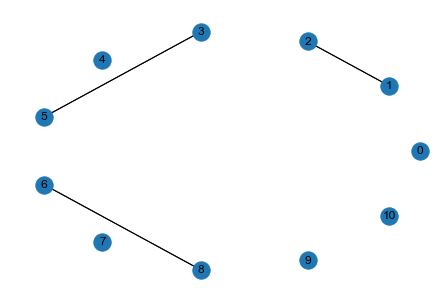

In [34]:
graphs.add_edges_from(e)
pos = nx.circular_layout(graphs)
nx.draw(graphs, pos=pos, arrows=False, with_labels=True)
plt.show()

## Exercise2: Draw each IRIS class with different node shapes from the calculated graph

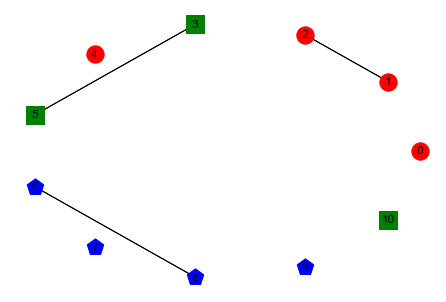

In [35]:
nodes1 = []
nodes2 = []
nodes3 = []
for i in a:
    if df_iris[4][i] == 'Iris-versicolor':
        nodes1.append(i)
    elif df_iris[4][i] == 'Iris-setosa':
        nodes2.append(i)
    else:
        nodes3.append(i)

subGraph1 = nx.subgraph(graphs, nodes1)
subGraph2 = nx.subgraph(graphs, nodes2)
subGraph3 = nx.subgraph(graphs, nodes3)

nx.draw(subGraph1, pos=pos, arrows=False, with_labels=True, node_shape='o', node_color='red')
nx.draw(subGraph2, pos=pos, arrows=False, with_labels=True, node_shape='s', node_color='green')
nx.draw(subGraph3, pos=pos, arrows=False, with_labels=True, node_shape='p', node_color='blue')

## Exercise3: Draw degree distribution of the calculated graph

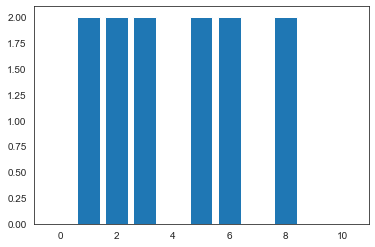

In [58]:
nodesName = [i for i in range(11)]
nodesDegree = []
for i in nodesName:
    nodesDegree.append(graphs.degree(i))

plt.bar(nodesName, nodesDegree)
plt.show()